## **PROJECT PROPOSAL**

*What is your issue of interest (provide sufficient background information)?*
- Exploration and in-depth Analysis of the Novel Corona Virus Dataset data to perform visualization and analysis.I have taken the data source from  https://covid19.who.int/table. The Novel Corona Virus Dataset has been collected by the WHO.

*Why is this issue important to you and/or to others?*
-I have been interested in working with such data which would help us to understand the data source easily and encouraged me to know more about the Novel Corona Virus Dataset. In current scenario, I feel such exploration and indepth analysis would be useful.

*What questions do you have in mind and would like to answer?*
- Which country are having the highest no. of new confirmed COVID cases currently?
- Secondly, In which country deaths are more due to COVID?
- And, How much percentage of the cases increased from the begining ?
- What is the Mortality rate over time?

*Where do you get the data to help answer your questions?*
- I have taken the data source from  https://covid19.who.int/table.

*What will be your unit of analysis (for example, patient, organization, or country)? Roughly how many units (observations) do you expect to analyze?*
- My units of anaylsis is the confirmed cases of COVID and Death cases and also country. I would analysis the whole dataset with help of bar chart using 66272 rows related to units mentioned above.

*What variables/measures do you plan to use in your analysis (variables should be tied to the questions in #3)?*
Variables I plan to use in my anaylsis are country, confirmed cases and death cases and date.

*What kinds of techniques do you plan to use (for example, summary statistics, scatter plot, bar chart, chi-squared test)?*
- All the above analysis and hypothesis would be achieved by plotting bar charts, histogram, summary statistics and line charts with good visualization.






**Importing necessary libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
sns.set(color_codes=True)
from itertools import cycle, islice

**Reading data from the csv file using pandas and loading the data**

In [2]:
df = pd.read_csv('WHO-COVID-19-global-data-2.csv')

**Using shape, able to identify the size of the data frame which gives in the format of (rows,columns)**

In [3]:
df.shape

(68855, 8)

**There are 68855 rows and 8 columns**

**Identifying the data types of all the columns in the dataframe**

In [4]:
df.dtypes

Date_reported         object
 Country_code         object
 Country              object
 WHO_region           object
 New_cases             int64
 Cumulative_cases      int64
 New_deaths            int64
 Cumulative_deaths     int64
dtype: object

**Using head function, identifying the first 5 rows of the data frame**

In [5]:
df.head(5) 

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0


**Using head function, identifying the last 5 rows of the data frame**

In [6]:
df.tail(5)

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
68850,2020-10-17,ZW,Zimbabwe,AFRO,24,8099,0,231
68851,2020-10-18,ZW,Zimbabwe,AFRO,11,8110,0,231
68852,2020-10-19,ZW,Zimbabwe,AFRO,37,8147,0,231
68853,2020-10-20,ZW,Zimbabwe,AFRO,12,8159,1,232
68854,2020-10-21,ZW,Zimbabwe,AFRO,28,8187,1,233


**Using sample and specifying n = 5 ,Looking at a random sample of 5**

In [7]:
df.sample(n=5, random_state=0)

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
6135,2020-10-04,BZ,Belize,AMRO,54,2080,1,28
29640,2020-02-19,IM,Isle of Man,EURO,0,0,0,0
15027,2020-03-27,CW,Curaçao,AMRO,0,7,0,1
47328,2020-06-06,PA,Panama,AMRO,435,15044,6,363
43081,2020-01-13,NC,New Caledonia,WPRO,0,0,0,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68855 entries, 0 to 68854
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Date_reported       68855 non-null  object
 1    Country_code       68562 non-null  object
 2    Country            68855 non-null  object
 3    WHO_region         68855 non-null  object
 4    New_cases          68855 non-null  int64 
 5    Cumulative_cases   68855 non-null  int64 
 6    New_deaths         68855 non-null  int64 
 7    Cumulative_deaths  68855 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 4.2+ MB


**Using describe function**

**The describe() method returns the general stats of the numeric columns in the dataframe.This function returns the count, mean, standard deviation, minimum and maximum values and the quantiles of the data**

In [9]:
df.describe()

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
count,68855.000000,6.885500e+04,68855.000000,68855.000000
mean,590.595280,4.630728e+04,16.292833,1723.343388
std,4046.975799,3.399579e+05,108.554217,10605.033483
min,-8261.000000,0.000000e+00,-514.000000,0.000000
25%,0.000000,0.000000e+00,0.000000,0.000000
50%,0.000000,2.300000e+02,0.000000,4.000000
75%,71.000000,5.484000e+03,1.000000,106.000000
max,97894.000000,8.124633e+06,6409.000000,218641.000000


In [10]:
df.columns = df.columns.str.strip()

**The duplicated() method returns a boolean series which is then used as a mask on the original dataframe. The output shows that no two records have the same country, state and date. So we can conclude that all observations in the dataset are unique.**

In [11]:
#checking for duplicate rows
duplicate_rows=df.duplicated(['Country','Country_code','Date_reported'])
df[duplicate_rows]

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths


**There are no duplicate rows in this dataset.**

**The unique() method returns a unique values on the original dataframe. The output shows that the list of unique values in the dataset.**

In [12]:
#listing all the countries where the virus has spread to
country_list=list(df['Country'].unique())
print(country_list)
print(len(country_list))

['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia (Plurinational State of)', 'Bonaire, Sint Eustatius and Saba', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', 'Côte d’Ivoire', 'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czechia', "Democratic People's Republic of Korea", 'Democratic Republic of the Congo', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Falkland Islan

**There are 235 countries which have covid cases.**

**Changing date in date format and creating a column with month and year.**

In [13]:
df['Date_reported'] = pd.to_datetime(df['Date_reported'])
df['year_month'] = df['Date_reported'].dt.strftime('%b-%Y')

**Country which has highest cases in the country using idmax**

In [14]:
df.iloc[df['Cumulative_cases'].idxmax()]

Date_reported             2020-10-21 00:00:00
Country_code                               US
Country              United States of America
WHO_region                               AMRO
New_cases                               59018
Cumulative_cases                      8124633
New_deaths                                510
Cumulative_deaths                      218641
year_month                           Oct-2020
Name: 65924, dtype: object

**Creating a bar displaying the number of cases with specific to months.**

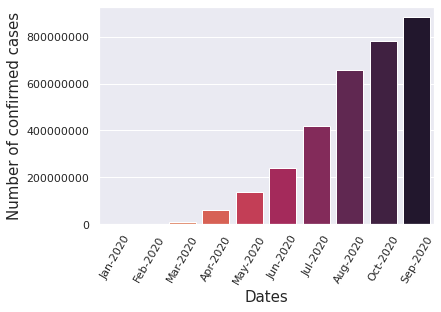

In [15]:
#sns.axes_style("whitegrid")
sns.barplot(
x="year_month", 
y="Cumulative_cases", data=df.groupby(['year_month']).sum().reset_index(drop=None).sort_values('Cumulative_cases'),palette = 'rocket_r')
plt.xticks(rotation=60)
plt.ylabel('Number of confirmed cases',fontsize=15)
plt.xlabel('Dates',fontsize=15)
plt.ticklabel_format(style='plain', axis='y')


**Creating a bar displaying the number of Death cases with specific to months.**

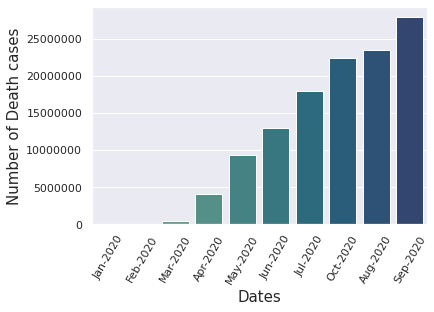

In [16]:
#sns.axes_style("whitegrid")
sns.barplot(
x="year_month", 
y="Cumulative_deaths", data=df.groupby(['year_month']).sum().reset_index(drop=None).sort_values('Cumulative_deaths'),palette = 'crest')
plt.xticks(rotation=60)
plt.ylabel('Number of Death cases',fontsize=15)
plt.xlabel('Dates',fontsize=15)
plt.ticklabel_format(style='plain', axis='y')


**Displaying the top 5 countries which have covid cases.**

In [17]:
data = df.groupby('Country')['Cumulative_cases'].sum().sort_values(ascending=False)[:5]

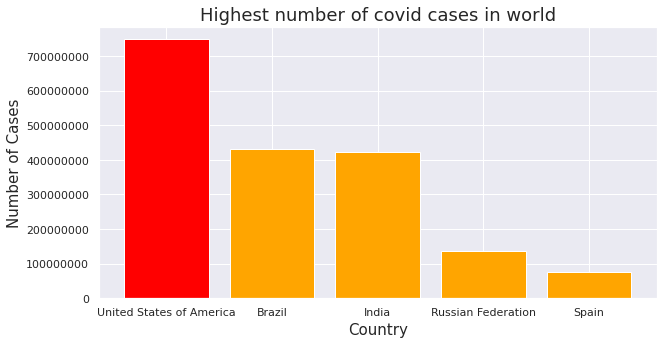

In [18]:
#plot the bar graph with different color to identify the highest number of dialysis centres
plt.figure(figsize=(10,5))
for i,v in data.iteritems():
    if i == 'United States of America':
        _=plt.bar(i,v,color='red')
    else:
        _=plt.bar(i,v,color='orange')

#Setting the titles, x and y labels        
_=plt.xlabel('Country',fontsize=15)
_=plt.ylabel('Number of Cases',fontsize=15)
_=plt.title('Highest number of covid cases in world',fontsize=18)
_=plt.xticks(rotation=0)
_=plt.ticklabel_format(style='plain', axis='y')
plt.show()

**United States of America has highest number of cases in the world.**

**Specifying the Mortality Rate.**

In [19]:
df['mrate'] = df['Cumulative_deaths']*100/df['Cumulative_cases']

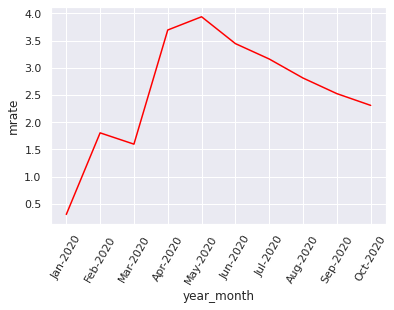

In [20]:
sns.lineplot(x = "year_month", y = "mrate", data=df,color = 'red')
plt.xticks(rotation=60)
plt.show()

**The mortality rate went above 3.5 in the month of April, May and June. Present, the rate is decreasing.**

**Calculating the Percentage Increase in Covid cases.**

In [21]:
data=df.groupby(['year_month']).sum().reset_index(drop=None).sort_values('year_month')
data

,year_month,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,mrate
0,Apr-2020,2337026,59254005,183750,4061244,23485.711241
1,Aug-2020,8045155,658854647,181146,23502513,18835.353887
2,Feb-2020,75940,1636554,2722,45161,1606.636761
3,Jan-2020,9910,37941,213,872,52.577470
4,Jul-2020,6933345,419282803,162897,17987393,21178.382076
5,Jun-2020,4235128,238582577,134349,13019649,22329.726350
6,Mar-2020,682605,8203411,37901,383659,7345.788490
7,May-2020,2835662,139383291,141971,9339686,26325.988655
8,Oct-2020,7099708,780556446,116464,22435969,10528.060028
9,Sep-2020,8410959,882696297,160430,27884663,16370.308755


In [22]:
Increase = ((data['Cumulative_cases'].max() - data['Cumulative_cases'].min()) / data['Cumulative_cases'].max()) * 100
print("The percentage increase in the number of cases till now from Jan :" , Increase)

The percentage increase in the number of cases till now from Jan : 99.99570169262871


**There is 99% increase in covid cases since Jan.**

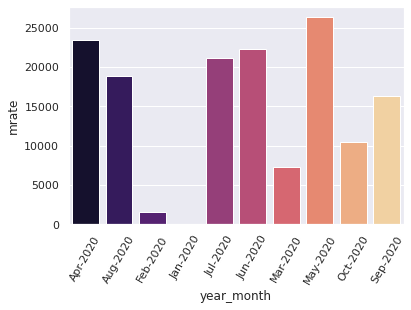

In [30]:
sns.barplot(x = "year_month", y = "mrate", data=data.sort_values('year_month'),palette = 'magma')
plt.xticks(rotation=60)
plt.show()

**There was highest mortality rate in the Month of May and April due to Covid-19.**

**Conclusions:**
* There are 235 countries which have covid cases.
* United States of America has highest number of cases in the world.
* The mortality rate went above 3.5 in the month of April, May and June. Present, the rate is decreasing.
* There is 99% increase in Covid cases since Jan 2020.
* There was highest mortality rate in Month of May and April due to Covid 19.

**Learned:**
* Different visualization techniques
* Setting individual bar labels
* Using functions in pandas